# Descrição do Dataset

O dataset utilizado neste projeto foi encontrado no <a href="https://www.kaggle.com/mickey1968/individual-company-sales-data">kaggle</a>. Trata-se de dados de vendas de uma única empresa, com 40 mil instâncias e 15 features. Cada instância corresponde a informações sobre um único cliente.

<div class="alert alert-info">
  <strong><h3>Informações sobre as variáveis:</h3></strong><br>
    <li><strong>flag:</strong> (target) - o cliente comprou o produto em questão ou não? [variável binária]<br></li>
        <li><strong>gender:</strong> gênero do cliente. [variável binária]<br></li>
<li><strong>education:</strong> grau de escolaridade do cliente. [variável categórica]<br></li>
<li><strong>house_val:</strong> valor da casa que o cliente mora. [variável numérica]<br></li>
<li><strong>age:</strong> idade do cliente (faixa etária). [variável categórica]<br></li>
<li><strong>online:</strong> o cliente já fez compras online ou não? [variável binária]<br></li>
<li><strong>customer_psy:</strong> descreve a psicologia do consumidor com base na área de residência. [variável categórica]<br></li>
<li><strong>marriage:</strong> estado civil do cliente. [variável categórica]<br></li>
<li><strong>children:</strong> se o cliente tem filhos ou não. [variável binária]<br></li>
<li><strong>occupation:</strong> profissão do cliente. [variável categórica]<br></li>
<li><strong>mortgage:</strong> informações sobre empréstimos imobiliários do cliente. [variável categórica]<br></li>
<li><strong>house_own:</strong> se o cliente tem casa própria ou não. [variável binária]<br></li>
<li><strong>region:</strong> em que área o cliente está? [variável categórica]<br></li>
<li><strong>car_prob:</strong> probabilidade do cliente comprar um novo carro. [variável numérica]<br></li>
<li><strong>fam_income:</strong> renda familiar do cliente (sendo A a menor renda e L a maior). [variável categórica]</li>      
</div>

# Funções Utilizadas ao longo da análise

In [1]:
# Função para mostrar os valores únicos das colunas escolhidas

def valores_unicos(df):

    for col in df:  # Loop entre as colunas do dataset
        print(col)  # Printando o nome da coluna
        # Printando a quantidade de valores únicos
        print('A quantidade de valores únicos é: ', df[col].nunique())
        # Mostrando quais são os valores únicos
        print('Os valores únicos são: ', df[col].unique())
        print('\n')

In [2]:
# Função para mostrar a contagem dos valores de colunas específicas em ordem crescente

def contagem_valores(df):
    for col in df:
        print(col)
        print(df[col].value_counts(ascending=True))
        print('\n')

# Sumário

[1. Importação das Bibliotecas e dos Dados](#1.-Importação-das-Bibliotecas-e-dos-Dados)<br>
[2. Pré-Visualização dos Dados](#2.-Pré-Visualização-dos-Dados)<br>
[3. Pré-Processamento dos Dados](#3.-Pré-Processamento-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Limpeza dos Dados](#3.1.-Limpeza-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Feature Engineering](#3.2.-Feature-Engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Formatação dos Dados](#3.3.-Formatação-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.4. Normalização dos Dados](#3.4.-Normalização-dos-Dados)<br>
[4. Análise Exploratória dos Dados](#4.-Análise-Exploratória-dos-Dados)<br>
[5. Modelo de Classificação](#5.-Modelo-de-Classificação)<br>

# 1. Importação das Bibliotecas e dos Dados

In [3]:
#!pip install requirements.txt

In [4]:
# Importação das principais bibliotecas que serão utilizadas no projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
  <strong><h3>Versões das Bibliotecas:</h3></strong><br>
    <li><strong>Pandas:</strong> 1.1.3<br></li>
    <li><strong>Numpy:</strong> 1.19.2<br></li>
<li><strong>Matplotlib:</strong> 3.3.2<br></li>
<li><strong>Seaborn:</strong> 0.11.0<br></li>      
</div>

In [5]:
# Importando os dados que serão utilizados

df = pd.read_csv('sales_data.csv')

# 2. Pré-Visualização dos Dados

In [6]:
# Visualizando o tamanho do dataset
df.shape

(40000, 15)

In [7]:
# Visualizando as colunas do dataset
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'marriage', 'child', 'occupation', 'mortgage',
       'house_owner', 'region', 'car_prob', 'fam_income'],
      dtype='object')

In [8]:
# Visualizando as 10 primeiras linhas
df.head(10)

flag gender        education  house_val     age online customer_psy  \
0    Y      M          4. Grad     756460   1_Unk      N            B   
1    N      F          3. Bach     213171   7_>65      N            E   
2    N      M  2. Some College     111147  2_<=25      Y            C   
3    Y      M  2. Some College     354151  2_<=25      Y            B   
4    Y      F  2. Some College     117087   1_Unk      Y            J   
5    Y      F          3. Bach     248694  6_<=65      Y            B   
6    Y      M          3. Bach    2000000   1_Unk      Y            A   
7    N      F          3. Bach     416925  5_<=55      Y            C   
8    N      F            1. HS     207676  4_<=45      Y            G   
9    Y      M            1. HS     241380   1_Unk      Y            C   

  marriage child     occupation mortgage house_owner     region  car_prob  \
0      NaN     U   Professional     1Low         NaN    Midwest         1   
1      NaN     U   Professional     1Low       Owner  Northeast         3   
2      NaN     Y   Professional     1Low       Owner    Midwest         1   
3   Single     U  Sales/Service     1Low         NaN       West         2   
4  Married     Y  Sales/Service     1Low         NaN      South         7   
5  Married     N   Professional     2Med       Owner       West         1   
6  Married     U   Professional     1Low         NaN  Northeast         5   
7  Married     Y   Professional     1Low       Owner      South         2   
8      NaN     Y    Blue Collar     1Low      Renter       West         5   
9  Married     U  Sales/Service     1Low         NaN  Northeast         6   

  fam_income  
0          L  
1          G  
2          J  
3          L  
4          H  
5          G  
6          C  
7          I  
8          D  
9          G

In [9]:
# Análise Estatística dos dados
# Em ordem: quantidade de linhas, quantidade de valores únicos, moda, frequência da moda, média, desvio padrão,
 # valor mínimo, primeiro quartil, segundo quartil (mediana), terceiro quartil
df.describe(include='all')

flag gender        education     house_val     age online  \
count   40000  40000            39259  4.000000e+04   40000  40000   
unique      2      3                5           NaN       7      2   
top         Y      M  2. Some College           NaN  5_<=55      Y   
freq    20000  22019            11400           NaN    8103  27319   
mean      NaN    NaN              NaN  3.072138e+05     NaN    NaN   
std       NaN    NaN              NaN  4.222146e+05     NaN    NaN   
min       NaN    NaN              NaN  0.000000e+00     NaN    NaN   
25%       NaN    NaN              NaN  8.065725e+04     NaN    NaN   
50%       NaN    NaN              NaN  2.148720e+05     NaN    NaN   
75%       NaN    NaN              NaN  3.937620e+05     NaN    NaN   
max       NaN    NaN              NaN  9.999999e+06     NaN    NaN   

       customer_psy marriage  child    occupation mortgage house_owner region  \
count         40000    25973  40000         40000    40000       36623  40000   
unique           11        2      4             6        3           2      5   
top               B  Married      Y  Professional     1Low       Owner  South   
freq           8197    20891  18012         14936    29848       29232  15676   
mean            NaN      NaN    NaN           NaN      NaN         NaN    NaN   
std             NaN      NaN    NaN           NaN      NaN         NaN    NaN   
min             NaN      NaN    NaN           NaN      NaN         NaN    NaN   
25%             NaN      NaN    NaN           NaN      NaN         NaN    NaN   
50%             NaN      NaN    NaN           NaN      NaN         NaN    NaN   
75%             NaN      NaN    NaN           NaN      NaN         NaN    NaN   
max             NaN      NaN    NaN           NaN      NaN         NaN    NaN   

            car_prob fam_income  
count   40000.000000      40000  
unique           NaN         13  
top              NaN          E  
freq             NaN       8432  
mean        3.491150        NaN  
std         2.577719        NaN  
min         0.000000        NaN  
25%         1.000000        NaN  
50%         3.000000        NaN  
75%         5.000000        NaN  
max         9.000000        NaN

<div class="alert alert-warning">
Antes de começar o pré-processamento dos dados, é importante entender melhor quais dados temos em mãos. Uma forma interessante de se fazer isso é sabendo quais e quantos são os valores únicos de cada uma das variáveis.
</div>

In [10]:
# Visualizando os valores únicos do dataframe inteiro
valores_unicos(df);

flag
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']


gender
A quantidade de valores únicos é:  3
Os valores únicos são:  ['M' 'F' 'U']


education
A quantidade de valores únicos é:  5
Os valores únicos são:  ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]


house_val
A quantidade de valores únicos é:  19572
Os valores únicos são:  [756460 213171 111147 ... 120630 603554 213596]


age
A quantidade de valores únicos é:  7
Os valores únicos são:  ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']


online
A quantidade de valores únicos é:  2
Os valores únicos são:  ['N' 'Y']


customer_psy
A quantidade de valores únicos é:  11
Os valores únicos são:  ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']


marriage
A quantidade de valores únicos é:  2
Os valores únicos são:  [nan 'Single' 'Married']


child
A quantidade de valores únicos é:  4
Os valores únicos são:  ['U' 'Y' 'N' '0']


occupation
A quantidade de valores únicos é:  6
Os valores úni

# 3. Pré-Processamento dos Dados

## 3.1. Limpeza dos Dados

### 3.1.1. Variáveis Desconhecidas

<div class="alert alert-danger">
Pelo código de valores únicos, é possível observar que algumas variáveis apresentam valores desconhecidos. Primeiro, é preciso verificar quantas vezes variáveis como 'U' e 'Unknown' aparecem em cada variável para depois fazer a tratativa.<br>
Pelo código, as seguintes variáveis apresentaram valores classificados como desconhecidos: gender, age, child.
</div>

In [11]:
# Criando uma variável com as colunas que possuem valores desconhecidos
features_unk = df[['gender', 'age', 'child', 'fam_income']]

In [12]:
# Visualizando informações de valores únicos em cada coluna

valores_unicos(features_unk);

gender
A quantidade de valores únicos é:  3
Os valores únicos são:  ['M' 'F' 'U']


age
A quantidade de valores únicos é:  7
Os valores únicos são:  ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']


child
A quantidade de valores únicos é:  4
Os valores únicos são:  ['U' 'Y' 'N' '0']


fam_income
A quantidade de valores únicos é:  13
Os valores únicos são:  ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']




In [13]:
# Visualizando a quantidade de valores para cada coluna
contagem_valores(features_unk);

gender
U     1151
F    16830
M    22019
Name: gender, dtype: int64


age
2_<=25    2360
7_>65     4822
3_<=35    4984
6_<=65    5907
1_Unk     6709
4_<=45    7115
5_<=55    8103
Name: age, dtype: int64


child
0      127
U     8528
N    13333
Y    18012
Name: child, dtype: int64


fam_income
U     153
K    1487
J    1614
L    1617
I    1622
B    2169
A    2274
H    2498
C    2687
G    4224
D    4582
F    6641
E    8432
Name: fam_income, dtype: int64




In [14]:
print('As variáveis desconhecidas da coluna gender correspondem a {:.2%} do total de instâncias.'.format(
    1151/df.shape[0]))

As variáveis desconhecidas da coluna gender correspondem a 2.88% do total de instâncias.


In [15]:
print('As variáveis desconhecidas da coluna age correspondem a {:.2%} do total de instâncias.'.format(
    6709/df.shape[0]))

As variáveis desconhecidas da coluna age correspondem a 16.77% do total de instâncias.


In [16]:
print('As variáveis desconhecidas da coluna child correspondem a {:.2%} do total de instâncias.'.format(
    8528/df.shape[0]))

As variáveis desconhecidas da coluna child correspondem a 21.32% do total de instâncias.


In [17]:
print('As variáveis desconhecidas da coluna fam_income correspondem a {:.2%} do total de instâncias.'.format(
    153/df.shape[0]))

As variáveis desconhecidas da coluna fam_income correspondem a 0.38% do total de instâncias.


<div class="alert alert-warning">
As variáveis desconhecidas podem ser transformadas em nulas (visto que não temos essa informação de qualquer forma). Posteriormente, os dados serão tratados.
</div>

In [18]:
# Fazendo a substituição nas colunas

# Gender
df['gender'] = df.gender.replace('U', np.NaN)

# Age
df['age'] = df.age.replace('1_Unk', np.NaN)

# Child - OBS: A coluna child tem também outra variável desconhecida, o 0
df['child'] = df.child.replace('U', np.NaN)
df['child'] = df.child.replace('0', np.NaN)

# fam_income
df['fam_income'] = df.fam_income.replace('U', np.NaN)

### 3.1.2. Tratamento de Dados Nulos

<div class="alert alert-danger">
Agora que as variáveis desconhecidas já foram substituídas por valores nulos, podemos ver a quantidade de valores nulos por cada coluna.
</div>

In [19]:
# Visualizando quantos dados nulos aparecem em cada coluna (VALOR ABSOLUTO)
df.isnull().sum()

flag                0
gender           1151
education         741
house_val           0
age              6709
online              0
customer_psy        0
marriage        14027
child            8655
occupation          0
mortgage            0
house_owner      3377
region              0
car_prob            0
fam_income        153
dtype: int64

In [20]:
# Visualizando quantos dados nulos aparecem em cada coluna (VALOR RELATIVO)
df.isnull().sum() / df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.3825
dtype: float64

<div class="alert alert-danger">
As variáveis 'flag', 'house_val', 'online', 'customer_psy', 'occupation', 'mortgage', 'region' e 'car_prob' não apresentaram valores nulos. Todas as outras apresentaram, variando de 0.38% até 35.06%.<br>
Vamos tratar caso a caso (da menor proporção até a maior proporção). Vale lembrar que todas essas features são categóricas.
</div>

#### 3.1.2.1. Feature: 'fam_income'

In [21]:
# Visualizando os valores da coluna 'fam_income' em ordem crescente
df['fam_income'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.003825
K      0.037175
J      0.040350
L      0.040425
I      0.040550
B      0.054225
A      0.056850
H      0.062450
C      0.067175
G      0.105600
D      0.114550
F      0.166025
E      0.210800
Name: fam_income, dtype: float64

<div class="alert alert-warning">
Como valores nulos correspondem a uma parcela muito baixa do total dos dados (0.38%) e existem muitas categorias, esses valores serão removidos.
</div>

In [22]:
# Deletando apenas os valores nulos
df.dropna(subset=['fam_income'],inplace=True)

In [23]:
# Visualizando o tamanho atual do dataset
df.shape

(39847, 15)

#### 3.1.2.2. Feature: 'education'

In [24]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['education'].value_counts(ascending=True, normalize=True, dropna=False)

NaN                0.018044
0. <HS             0.096168
4. Grad            0.148142
1. HS              0.220544
3. Bach            0.231937
2. Some College    0.285166
Name: education, dtype: float64

<div class="alert alert-warning">
Os valores nulos correspondem a apenas 1.8% do total dos dados. Como uma possível substituição desses valores não causará um grande impacto nos dados como um todo, é possível fazer a substituição pela moda.
</div>

In [25]:
# Substituindo os valores nulos
df['education'] = df['education'].fillna(value='2. Some College')

#### 3.1.2.3. Feature: 'gender'

In [26]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['gender'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.028785
F      0.420508
M      0.550706
Name: gender, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'gender' correspondem a apenas 2.87% do total dos dados. Há 42.05% de mulheres e 55.07% de homens, uma diferença de mais de 10% entre um gênero e outro. Sendo assim, os valores nulos podem ser substituídos pelo valor de maior frequência.
</div>

In [27]:
# Substituindo os valores nulos
df['gender'] = df['gender'].fillna(value='M')

#### 3.1.2.4. Feature: 'house_owner'

In [28]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['house_owner'].value_counts(ascending=True, normalize=True, dropna=False)

NaN       0.081487
Renter    0.185309
Owner     0.733205
Name: house_owner, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'gender' correspondem a 8.14% do total dos dados, um valor mais considerável em relação às outras duas features analisadas. Owner corresponde a 73.32% dos dados e Renter a 18.53%. Da mesma forma como fizemos anteriormente, podemos substituir os valores nulos pela moda.
</div>

In [29]:
# Substituindo os valores nulos
df['house_owner'] = df['house_owner'].fillna(value='Owner')

#### 3.1.2.5. Feature: 'age'

In [30]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['age'].value_counts(ascending=True, normalize=True, dropna=False)

2_<=25    0.058976
7_>65     0.120360
3_<=35    0.124777
6_<=65    0.147690
NaN       0.167189
4_<=45    0.178106
5_<=55    0.202901
Name: age, dtype: float64

<div class="alert alert-warning">
Diferente das features anteriores, os valores nulos não correspondem à menor parcela dos dados. São 16.71% de dados. Substituir os valores nulos pela moda (>=55 anos), por exemplo, poderia causar uma diferença muito grande entre a primeira categoria em quantidade e a segunda (sendo que a diferença real é de apenas aproximadamente 2%). Sendo assim, as linhas nulas serão removidas.
</div>

In [31]:
# Deletando apenas os valores nulos
df.dropna(subset=['age'],inplace=True)

In [32]:
# Visualizando o tamanho atual do dataset
df.shape

(33185, 15)

#### 3.1.2.6. Feature: 'child'

In [33]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['child'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.190538
N      0.355341
Y      0.454121
Name: child, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'child' correspondem a 19.05% do total dos dados. 35.53% dos clientes não possuem filhos e 45.41% possuem. Se essa parcela nula for substituída (seja pelo menor ou pelo maior), não transpareceria a realidade visto que é uma porcentagem alta. Os dados nulos serão removidos.
</div>

In [34]:
# Deletando apenas os valores nulos
df.dropna(subset=['child'],inplace=True)

In [35]:
df.shape

(26862, 15)

#### 3.1.2.7. Feature: 'marriage'

In [36]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['marriage'].value_counts(ascending=True, normalize=True, dropna=False)

Single     0.093143
NaN        0.335269
Married    0.571588
Name: marriage, dtype: float64

<div class="alert alert-warning">
A feature 'marriage' é a que possui a maior quantidade de valores nulos. Mesmo após a remoção de diversas linhas anteriormente, ainda corresponde a uma parcela alta dos dados (33.52%). Como já perdemos 32.84% com as limpezas anteriores, se removêssemos mais 33.52% dos dados agora, os dados tratados ficariam muito reduzidos em relação aos originais. Sendo assim, a feature inteira será removida.
</div>

In [37]:
# Deletando a coluna 'marriage'
df = df.drop(columns=['marriage'])

### 3.1.2. Linhas duplicadas

In [38]:
# Deletando linhas duplicadas
df.drop_duplicates(inplace=True)

In [39]:
# Verificando o shape do dataset
df.shape

(26823, 14)

### 3.1.3. Tratamento de Outliers

<div class="alert alert-warning">
Temos apenas duas variáveis numéricas: house_val e car_prob.
</div>

In [40]:
# Fazendo o cálculo do IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

house_val    307969.0
car_prob          3.0
dtype: float64


In [41]:
# Somando os outliers
outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier.sum()

age                0
car_prob         801
child              0
customer_psy       0
education          0
fam_income         0
flag               0
gender             0
house_owner        0
house_val       1599
mortgage           0
occupation         0
online             0
region             0
dtype: int64

<div class="alert alert-danger">
Pelo cálculo acima, vemos que existem 1599 outliers na coluna 'house_val' e 801 outliers na coluna 'car_prob'. Vamos visualizar esses outliers por um boxplot.</div>

#### 3.1.3.1. Feature: 'house_val'

<AxesSubplot:>

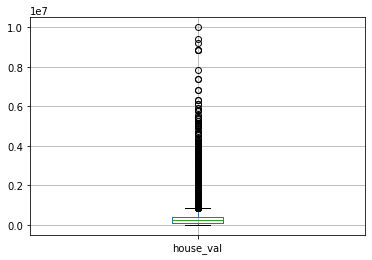

In [42]:
# Visualizando os outliers da coluna house_val
df.boxplot(column=['house_val'])

<div class="alert alert-warning">
A coluna apresenta diversos outliers, mas não necessariamente precisamos remover todos eles já que são também características do dataset. Vamos visualizar os outliers que estão mais discrepantes.
</div>

In [43]:
# Visualizando os outliers
df.loc[df['house_val'] >= 0.6e7]

flag gender        education  house_val     age online customer_psy  \
6046     Y      F          4. Grad    6842202  4_<=45      N            B   
6379     N      M          4. Grad    7410866  5_<=55      Y            B   
9126     Y      M          4. Grad    7383790  3_<=35      Y            B   
9560     Y      M          3. Bach    6104000  4_<=45      Y            B   
10497    Y      F          3. Bach    8875793   7_>65      Y            B   
12046    Y      M  2. Some College    7836282  4_<=45      Y            B   
12073    N      F          3. Bach    8848620  4_<=45      Y            B   
12119    N      F  2. Some College    9413054   7_>65      Y            B   
22735    Y      M          3. Bach    6303949  5_<=55      Y            B   
22953    Y      M          4. Grad    6850977  5_<=55      Y            B   
23677    Y      M  2. Some College    8869199   7_>65      N            B   
26722    Y      M          3. Bach    9999999  4_<=45      Y            C   
33183    Y      M          3. Bach    9197856  5_<=55      Y            B   
34313    Y      M  2. Some College    6337423  3_<=35      Y            B   
36780    N      F            1. HS    6116862   7_>65      N            A   

      child     occupation mortgage house_owner     region  car_prob  \
6046      Y   Professional     1Low      Renter  Northeast         1   
6379      N  Sales/Service     1Low       Owner       West         1   
9126      N   Professional    3High       Owner       Rest         8   
9560      Y   Professional     1Low       Owner  Northeast         1   
10497     Y        Retired     1Low       Owner      South         1   
12046     Y  Sales/Service    3High       Owner      South         1   
12073     Y   Professional     1Low       Owner  Northeast         1   
12119     N        Retired     1Low       Owner       West         2   
22735     Y   Professional    3High       Owner      South         1   
22953     Y   Professional    3High       Owner  Northeast         1   
23677     Y        Retired     1Low       Owner      South         3   
26722     Y   Professional     1Low       Owner      South         1   
33183     Y   Professional     1Low       Owner       West         1   
34313     Y   Professional    3High       Owner       West         1   
36780     N        Retired     1Low       Owner  Northeast         6   

      fam_income  
6046           C  
6379           L  
9126           C  
9560           L  
10497          A  
12046          K  
12073          C  
12119          C  
22735          L  
22953          L  
23677          L  
26722          L  
33183          L  
34313          L  
36780          D

In [44]:
# Deletando os outliers acima
df = df.loc[df['house_val'] < 0.6e7]

<AxesSubplot:>

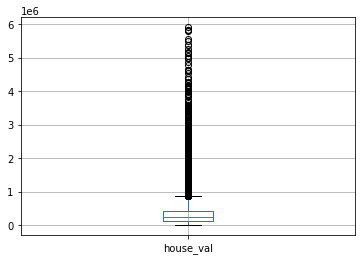

In [45]:
# Visualizando o boxplot novamente
df.boxplot(column=['house_val'])

<div class="alert alert-success">
Os outliers agora estão distribuídos de uma maneira mais uniforme.
</div>

In [46]:
# Visualizando o tamanho do dataset atual
df.shape

(26808, 14)

#### 3.1.3.1. Feature: 'car_prob'

<AxesSubplot:>

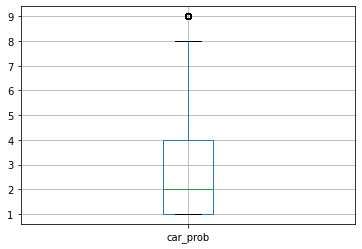

In [47]:
# Visualizando os outliers da coluna house_val
df.boxplot(column=['car_prob'])

In [48]:
# Visualizando os outliers
df.loc[df['car_prob'] == 9]

flag gender        education  house_val     age online customer_psy  \
56       N      F           0. <HS          0  4_<=45      N            G   
147      Y      M  2. Some College      89925  5_<=55      Y            F   
197      N      F           0. <HS          0  3_<=35      N            E   
200      Y      M          3. Bach          0  6_<=65      N            E   
375      N      M  2. Some College          0  4_<=45      N            G   
...    ...    ...              ...        ...     ...    ...          ...   
39830    N      M  2. Some College      27686  5_<=55      N            J   
39924    N      F  2. Some College     196636  3_<=35      N            C   
39939    N      F  2. Some College          0  2_<=25      Y            F   
39966    N      F            1. HS          0  5_<=55      Y            G   
39989    N      F            1. HS          0  5_<=55      N            H   

      child     occupation mortgage house_owner   region  car_prob fam_income  
56        Y  Sales/Service     1Low      Renter    South         9          A  
147       Y    Blue Collar     1Low       Owner     West         9          D  
197       Y  Sales/Service     1Low      Renter     West         9          A  
200       Y   Professional     1Low      Renter  Midwest         9          D  
375       Y    Blue Collar     1Low      Renter    South         9          E  
...     ...            ...      ...         ...      ...       ...        ...  
39830     N    Blue Collar     1Low       Owner    South         9          D  
39924     Y    Blue Collar     1Low       Owner  Midwest         9          E  
39939     Y  Sales/Service     1Low      Renter  Midwest         9          C  
39966     N   Professional     1Low      Renter    South         9          A  
39989     N   Professional     1Low      Renter    South         9          A  

[801 rows x 14 columns]

<div class="alert alert-warning">
Vemos acima que todas as instâncias com car_prob = 9 foram consideradas outliers. Os valores variam de 0 a 9, não faz sentido remover esses outliers.
</div>

## 3.2. Feature Engineering

In [49]:
# Visualizando as features atuais
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'child', 'occupation', 'mortgage', 'house_owner',
       'region', 'car_prob', 'fam_income'],
      dtype='object')

### 3.2.1. Variáveis Binárias

<div class="alert alert-danger">
A partir do código acima, é possível observar que as variáveis binárias estão com valores 'Y' e 'N'. Por isso, é preciso transformar 'Y' em 1 (sim) e 'N' em 0 (não), visto que o algoritmo precisa aprender a partir de números.<br>
As seguintes colunas serão ajustadas: flag, online, child.
</div>

In [50]:
# Criando variável com as features que serão transformadas
features_YN = df[['flag', 'online', 'child']]

# Loop entre as colunas da variável acima para fazer a substituição
for col in features_YN:
    df[col] = df[col].map({'Y': 1, 'N': 0})

In [51]:
# Printando o resultado 

valores_unicos(features_YN);

flag
A quantidade de valores únicos é:  2
Os valores únicos são:  ['N' 'Y']


online
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']


child
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']




<div class="alert alert-danger">
Além das colunas binárias de Y/N, há também outras 2 colunas binárias: gender (F/M) e house_owner (casa própria ou alugada?). Essas colunas também precisam ser ajustadas. <br>
<strong>OBS:</strong> Não necessariamente quer dizer que, na realidade, gêneros são binários. Mas, no caso do nosso problema, as únicas categorias que aparecem originalmente são F, M e U (unknown/desconhecido).
</div>

In [52]:
# Fazendo a substituição na coluna 'gender'
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [53]:
# Fazendo a substituição na coluna 'house_owner'
df['house_owner'] = df['house_owner'].map({'Renter': 0, 'Owner': 1})

In [54]:
# Criando variável das features binárias para visualizar como os dados estão após a tratativa
features_binarias = df[['gender', 'house_owner']]

# Printando o resultado 
valores_unicos(features_binarias);

gender
A quantidade de valores únicos é:  2
Os valores únicos são:  [0 1]


house_owner
A quantidade de valores únicos é:  2
Os valores únicos são:  [1 0]




### 3.2.2. Variáveis Categóricas

<div class="alert alert-warning">
Entre as variáveis categóricas, existem tipos diferentes que exigem tratativas também diferentes. Esses dois tipos aparecem nesse dataset:<br>
    <li><strong>Variáveis Ordinais:</strong> Existe ordenação entre as categorias.</li>
    <li><strong>Variáveis Nominais:</strong> Não existe ordenação entre as categorias.</li><br>
    <strong>As ordinais são:</strong> education, age, mortgage e fam_income.<br>
    <strong>As nonimais são:</strong> customer_psy, occupation e region.<br>
</div>

#### 3.2.2.1. Variáveis Categóricas Ordinais

In [55]:
# Criando variável auxiliar apenas para conferir se a ordenação ficou correta
df_categ_ord = df[['education', 'age', 'mortgage', 'fam_income']]

In [56]:
# Verificando os valores antes do encoding
contagem_valores(df_categ_ord);

education
0. <HS             2153
4. Grad            4194
1. HS              5927
3. Bach            6683
2. Some College    7851
Name: education, dtype: int64


age
2_<=25    1864
3_<=35    3843
7_>65     4183
6_<=65    5040
4_<=45    5723
5_<=55    6155
Name: age, dtype: int64


mortgage
2Med      3406
3High     3923
1Low     19479
Name: mortgage, dtype: int64


fam_income
K    1070
J    1192
I    1201
L    1238
B    1321
A    1356
C    1541
H    1829
D    2811
G    2914
F    4730
E    5605
Name: fam_income, dtype: int64




In [57]:
# Importação da biblioteca para fazer o encoder seguindo ordenação
from sklearn.preprocessing import OrdinalEncoder

# Atribuindo a função a uma variável
enc = OrdinalEncoder()

# Substituindo os valores originais pelos valores do encoding
df[['education', 'age', 'mortgage', 'fam_income']] = enc.fit_transform(df[['education', 'age', 'mortgage', 'fam_income']])

In [58]:
# Recriando variável auxiliar para checagem da ordenação pós-encoder
df_categ_ord = df[['education', 'age', 'mortgage', 'fam_income']]

In [59]:
# Checando se os valores ficaram corretos
contagem_valores(df_categ_ord);

education
0.0    2153
4.0    4194
1.0    5927
3.0    6683
2.0    7851
Name: education, dtype: int64


age
0.0    1864
1.0    3843
5.0    4183
4.0    5040
2.0    5723
3.0    6155
Name: age, dtype: int64


mortgage
1.0     3406
2.0     3923
0.0    19479
Name: mortgage, dtype: int64


fam_income
10.0    1070
9.0     1192
8.0     1201
11.0    1238
1.0     1321
0.0     1356
2.0     1541
7.0     1829
3.0     2811
6.0     2914
5.0     4730
4.0     5605
Name: fam_income, dtype: int64




<div class="alert alert-success">
Está correto.
</div>

#### 3.2.2.2. Variáveis Categóricas Nominais

<div class="alert alert-warning">
Para as variáveis categóricas nominais, podemos utilizar o método de dummies. Cada uma das três variáveis será separada em múltiplas colunas, de acordo com a quantidade de categorias de cada.
</div>

In [60]:
# Dummies das colunas nominais
df = pd.get_dummies(df, columns = ['customer_psy', 'occupation', 'region'])

In [61]:
# Visualizando as colunas atuais
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'child',
       'mortgage', 'house_owner', 'car_prob', 'fam_income', 'customer_psy_A',
       'customer_psy_B', 'customer_psy_C', 'customer_psy_D', 'customer_psy_E',
       'customer_psy_F', 'customer_psy_G', 'customer_psy_H', 'customer_psy_I',
       'customer_psy_J', 'occupation_Blue Collar', 'occupation_Farm',
       'occupation_Others', 'occupation_Professional', 'occupation_Retired',
       'occupation_Sales/Service', 'region_Midwest', 'region_Northeast',
       'region_Rest', 'region_South', 'region_West'],
      dtype='object')

## 3.3. Formatação dos Dados

In [62]:
# Verificando novamente com a função de contagem de valores
contagem_valores(df);

flag
0    12926
1    13882
Name: flag, dtype: int64


gender
1    11643
0    15165
Name: gender, dtype: int64


education
0.0    2153
4.0    4194
1.0    5927
3.0    6683
2.0    7851
Name: education, dtype: int64


house_val
383178        1
12387         1
155521        1
175740        1
1136259       1
           ... 
294300       17
2000000      20
1500000      31
1000000      53
0          4224
Name: house_val, Length: 15090, dtype: int64


age
0.0    1864
1.0    3843
5.0    4183
4.0    5040
2.0    5723
3.0    6155
Name: age, dtype: int64


online
0     7104
1    19704
Name: online, dtype: int64


child
0    11763
1    15045
Name: child, dtype: int64


mortgage
1.0     3406
2.0     3923
0.0    19479
Name: mortgage, dtype: int64


house_owner
0     3941
1    22867
Name: house_owner, dtype: int64


car_prob
9     801
7    1179
6    1324
8    1430
5    1896
4    2082
3    3902
2    5475
1    8719
Name: car_prob, dtype: int64


fam_income
10.0    1070
9.0     1192
8.0     1201
11.0    12

<div class="alert alert-warning">
Antes da etapa de Feature Engineering, é importante formatar os dados.
</div>

In [63]:
# Checando o formato das variáveis
df.dtypes

flag                          int64
gender                        int64
education                   float64
house_val                     int64
age                         float64
online                        int64
child                         int64
mortgage                    float64
house_owner                   int64
car_prob                      int64
fam_income                  float64
customer_psy_A                uint8
customer_psy_B                uint8
customer_psy_C                uint8
customer_psy_D                uint8
customer_psy_E                uint8
customer_psy_F                uint8
customer_psy_G                uint8
customer_psy_H                uint8
customer_psy_I                uint8
customer_psy_J                uint8
occupation_Blue Collar        uint8
occupation_Farm               uint8
occupation_Others             uint8
occupation_Professional       uint8
occupation_Retired            uint8
occupation_Sales/Service      uint8
region_Midwest              

<div class="alert alert-danger">
Algumas variáveis categóricas estão com o formato de float. É preciso alterar.
</div>

In [64]:
# Criando variável com as colunas que serão atualizadas
df_format = df[['flag', 'education', 'age', 'online', 'child', 'mortgage', 'fam_income']]

In [65]:
# Formatando os dados corretamente

for col in df_format:
    df[col] = df[col].astype('int64')

In [66]:
# Checando os formatos
df.dtypes

flag                        int64
gender                      int64
education                   int64
house_val                   int64
age                         int64
online                      int64
child                       int64
mortgage                    int64
house_owner                 int64
car_prob                    int64
fam_income                  int64
customer_psy_A              uint8
customer_psy_B              uint8
customer_psy_C              uint8
customer_psy_D              uint8
customer_psy_E              uint8
customer_psy_F              uint8
customer_psy_G              uint8
customer_psy_H              uint8
customer_psy_I              uint8
customer_psy_J              uint8
occupation_Blue Collar      uint8
occupation_Farm             uint8
occupation_Others           uint8
occupation_Professional     uint8
occupation_Retired          uint8
occupation_Sales/Service    uint8
region_Midwest              uint8
region_Northeast            uint8
region_Rest   

<div class="alert alert-success">
Está correto.
</div>

## 3.4. Normalização dos Dados

<div class="alert alert-warning">
No caso deste projeto, a última etapa de pré-processamento é a normalização dos dados numéricos.
</div>

In [67]:
# Importação da biblioteca para normalizar os dados (ficarão entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Criando um dataframe para os dados normalizados
df_norm = df.copy()

# Variável com as colunas que serão normalizadas
col_names = ['house_val', 'car_prob']

# Criando um dataframe separado apenas com as colunas que serão normalizadas
features = df[col_names]

# Usando a função de normalização
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

# Salvando no dataframe df_norm
df_norm[col_names] = features

In [68]:
# Visualizando os dados
df_norm.head()

flag  gender  education  house_val  age  online  child  mortgage  \
2      0       0          2   0.018819    0       1      1         0   
5      1       1          3   0.042108    4       1      0         1   
7      0       1          3   0.070593    3       1      1         0   
8      0       1          1   0.035163    2       1      1         0   
10     0       0          2   0.026797    5       1      1         1   

    house_owner  car_prob  ...  occupation_Farm  occupation_Others  \
2             1     0.000  ...                0                  0   
5             1     0.000  ...                0                  0   
7             1     0.125  ...                0                  0   
8             0     0.500  ...                0                  0   
10            1     0.250  ...                0                  0   

    occupation_Professional  occupation_Retired  occupation_Sales/Service  \
2                         1                   0                         0   
5                         1                   0                         0   
7                         1                   0                         0   
8                         0                   0                         0   
10                        0                   0                         1   

    region_Midwest  region_Northeast  region_Rest  region_South  region_West  
2                1                 0            0             0            0  
5                0                 0            0             0            1  
7                0                 0            0             1            0  
8                0                 0            0             0            1  
10               1                 0            0             0            0  

[5 rows x 32 columns]

<div class="alert alert-warning">
O dataframe de dados normalizados será utilizado agora apenas no treinamento do modelo. Agora, vamos explorar os dados utilizando a df.
</div>

# 4. Análise Exploratória dos Dados

In [ ]:
# Instalando a biblioteca pandas-profiling
#!pip install -U pandas-profiling

In [70]:
# Importando a biblioteca instalada
import pandas_profiling

# Utilizando o código para visualizar os dados
df.profile_report()

<div class="alert alert-danger">
Apesar do report acima já mostrar muitas informações sobre os dados automaticamente, algumas análises automáticas não são perfeitas. Um exemplo é a variável 'age', que é de multicategorias (diversas faixas etárias) e foi considerada uma variável numérica. Por isso, uma análise manual será feita.
</div>

## 4.1. Análise de Correlação

<div class="alert alert-warning">
Para fazer uma análise de correlação, por exemplo, faz sentido utilizarmos as variáveis numéricas e as categóricas ordinais.
</div>

In [71]:
# Visualizando as colunas
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'child',
       'mortgage', 'house_owner', 'car_prob', 'fam_income', 'customer_psy_A',
       'customer_psy_B', 'customer_psy_C', 'customer_psy_D', 'customer_psy_E',
       'customer_psy_F', 'customer_psy_G', 'customer_psy_H', 'customer_psy_I',
       'customer_psy_J', 'occupation_Blue Collar', 'occupation_Farm',
       'occupation_Others', 'occupation_Professional', 'occupation_Retired',
       'occupation_Sales/Service', 'region_Midwest', 'region_Northeast',
       'region_Rest', 'region_South', 'region_West'],
      dtype='object')

In [72]:
# Criando variável com as features que serão analisadas
df_corr = df[['education', 'house_val', 'age',
              'mortgage', 'house_owner', 'car_prob', 'fam_income']]

<AxesSubplot:>

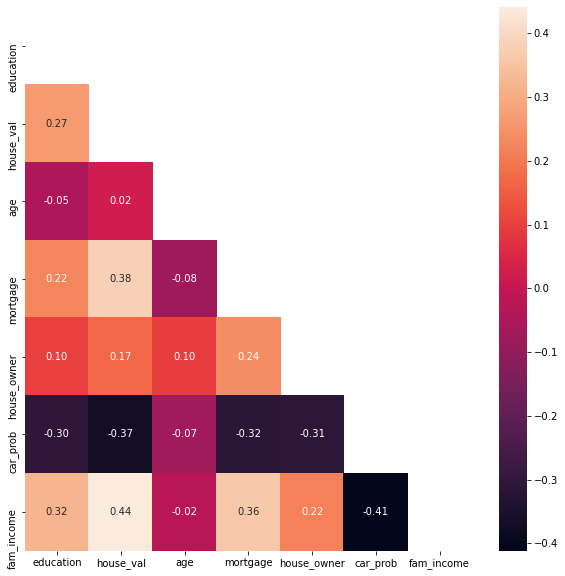

In [73]:
# Correlação das variáveis
plt.figure(figsize=(10,10))
matrix = np.triu(df_corr.corr())
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', mask=matrix)

<div class="alert alert-info">
Pelo heatmap acima, é possível ver que não há correlações muito fortes entre as variáveis (nem positiva e nem negativa). Correlações mais próximas de 1 são fortes e positivas, enquanto as mais próximas de -1 são também fortes, mas negativas. Não há nenhum caso assim nesse dataset.</div>

## 4.2. Histograma

<ipython-input-74-2a75ca25a94f>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax, ec = "k", alpha = .95, color = "violet")


array([[<AxesSubplot:title={'center':'flag'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'house_val'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'online'}>],
       [<AxesSubplot:title={'center':'child'}>,
        <AxesSubplot:title={'center':'mortgage'}>,
        <AxesSubplot:title={'center':'house_owner'}>,
        <AxesSubplot:title={'center':'car_prob'}>,
        <AxesSubplot:title={'center':'fam_income'}>,
        <AxesSubplot:title={'center':'customer_psy_A'}>],
       [<AxesSubplot:title={'center':'customer_psy_B'}>,
        <AxesSubplot:title={'center':'customer_psy_C'}>,
        <AxesSubplot:title={'center':'customer_psy_D'}>,
        <AxesSubplot:title={'center':'customer_psy_E'}>,
        <AxesSubplot:title={'center':'customer_psy_F'}>,
        <AxesSubplot:title={'center':'customer_psy_G'}>],
       [<AxesSubplot:title={'center':'customer

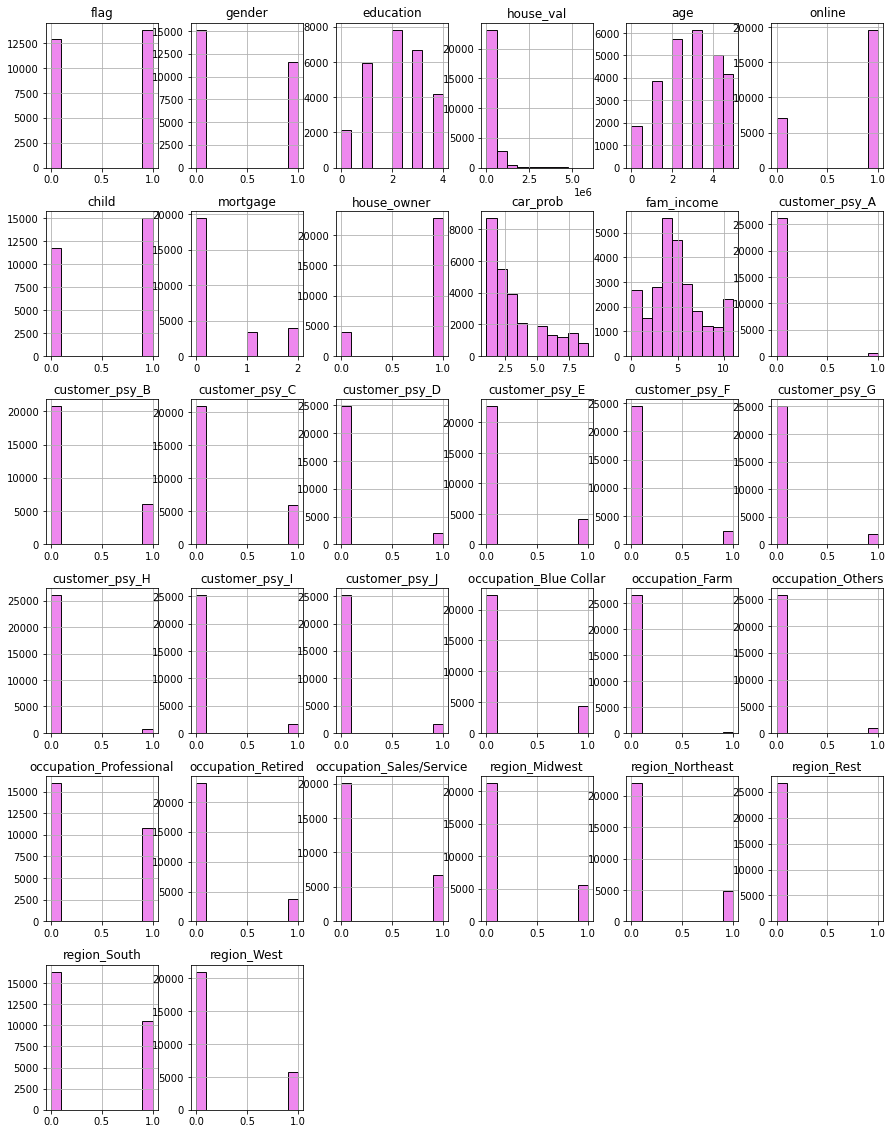

In [74]:
# Visualizando histogramas 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax, ec = "k", alpha = .95, color = "violet")

<div class="alert alert-danger">
A coluna 'house_val' apresenta uma grande quantidade de zeros. Isso também já foi mostrado anteriormente pelo pandas profiling: 15.8% dos dados são iguais a 0. Isso talvez signifique que aqueles que não tenham casa própria, tenham considerado 0 o valor de suas casas. Ou, ainda, pode ser algum erro que precise ser tratado.
</div>

In [75]:
# Visualizando os dados que 'house_val' = 0
df.loc[df['house_val'] == 0]

flag  gender  education  house_val  age  online  child  mortgage  \
13        0       0          0          0    0       1      0         0   
16        0       1          1          0    5       0      0         0   
35        0       0          4          0    3       1      1         0   
39        1       0          1          0    2       0      1         0   
46        0       0          1          0    3       1      0         0   
...     ...     ...        ...        ...  ...     ...    ...       ...   
39966     0       1          1          0    3       1      0         0   
39975     1       1          1          0    5       1      0         0   
39980     1       0          3          0    1       1      1         0   
39989     0       1          1          0    3       0      0         0   
39993     0       0          1          0    5       1      1         0   

       house_owner  car_prob  ...  occupation_Farm  occupation_Others  \
13               1         6  ...                0                  1   
16               1         5  ...                0                  0   
35               1         5  ...                0                  0   
39               0         3  ...                0                  0   
46               0         3  ...                0                  0   
...            ...       ...  ...              ...                ...   
39966            0         9  ...                0                  0   
39975            1         2  ...                0                  0   
39980            1         4  ...                0                  0   
39989            0         9  ...                0                  0   
39993            1         2  ...                0                  0   

       occupation_Professional  occupation_Retired  occupation_Sales/Service  \
13                           0                   0                         0   
16                           0                   1                         0   
35                           1                   0                         0   
39                           0                   0                         1   
46                           0                   0                         0   
...                        ...                 ...                       ...   
39966                        1                   0                         0   
39975                        0                   1                         0   
39980                        0                   0                         0   
39989                        1                   0                         0   
39993                        1                   0                         0   

       region_Midwest  region_Northeast  region_Rest  region_South  \
13                  0                 0            0             0   
16                  0                 0            0             1   
35                  0                 1            0             0   
39                  0                 0            0             1   
46                  1                 0            0             0   
...               ...               ...          ...           ...   
39966               0                 0            0             1   
39975               0                 0            0             1   
39980               0                 1            0             0   
39989               0                 0            0             1   
39993               0                 1            0             0   

       region_West  
13               1  
16               0  
35               0  
39               0  
46               0  
...            ...  
39966            0  
39975            0  
39980            0  
39989            0  
39993            0  

[4224 rows x 32 columns]

<div class="alert alert-danger">
Podemos ver que há linhas com pessoas que possuem casa própria com valor 0. Vamos filtrar pelas duas colunas.
</div>

In [76]:
# Visualizando os dados que 'house_val' = 0 e 'house_owner' = 0
df.loc[(df['house_val'] == 0) & (df['house_owner'] == 0)]

flag  gender  education  house_val  age  online  child  mortgage  \
39        1       0          1          0    2       0      1         0   
46        0       0          1          0    3       1      0         0   
56        0       1          0          0    2       0      1         0   
79        0       1          3          0    4       1      0         0   
102       0       1          2          0    2       1      0         0   
...     ...     ...        ...        ...  ...     ...    ...       ...   
39951     0       0          1          0    5       1      0         0   
39953     0       0          1          0    3       0      1         0   
39954     0       1          1          0    3       1      1         0   
39966     0       1          1          0    3       1      0         0   
39989     0       1          1          0    3       0      0         0   

       house_owner  car_prob  ...  occupation_Farm  occupation_Others  \
39               0         3  ...                0                  0   
46               0         3  ...                0                  0   
56               0         9  ...                0                  0   
79               0         2  ...                0                  0   
102              0         6  ...                0                  0   
...            ...       ...  ...              ...                ...   
39951            0         5  ...                0                  0   
39953            0         7  ...                0                  0   
39954            0         3  ...                0                  0   
39966            0         9  ...                0                  0   
39989            0         9  ...                0                  0   

       occupation_Professional  occupation_Retired  occupation_Sales/Service  \
39                           0                   0                         1   
46                           0                   0                         0   
56                           0                   0                         1   
79                           0                   1                         0   
102                          1                   0                         0   
...                        ...                 ...                       ...   
39951                        0                   1                         0   
39953                        0                   0                         0   
39954                        0                   0                         1   
39966                        1                   0                         0   
39989                        1                   0                         0   

       region_Midwest  region_Northeast  region_Rest  region_South  \
39                  0                 0            0             1   
46                  1                 0            0             0   
56                  0                 0            0             1   
79                  0                 0            0             1   
102                 0                 1            0             0   
...               ...               ...          ...           ...   
39951               0                 0            0             0   
39953               1                 0            0             0   
39954               0                 0            0             1   
39966               0                 0            0             1   
39989               0                 0            0             1   

       region_West  
39               0  
46               0  
56               0  
79               0  
102              0  
...            ...  
39951            1  
39953            0  
39954            0  
39966            0  
39989            0  

[1869 rows x 32 columns]

<div class="alert alert-danger">
Ainda assim, há muitas linhas com o valor 0, sendo o cliente proprietário de sua casa ou não. Isso mostra com clareza como um projeto de <strong>Ciência de Dados</strong> não é linear.
</div>

# 5. Modelo de Classificação

<div class="alert alert-warning">
O target deste projeto é 'flag'. Queremos saber se o cliente comprou o produto em questão que está sendo analisado ou não, com base nas variáveis independentes. Para isso, precisamos de um modelo de <strong>classificação</strong> e queremos prever duas classes: 0 ou 1, não ou sim.
</div>

## 5.1. Split do Dataset

In [77]:
# Checando as colunas
df_norm.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'child',
       'mortgage', 'house_owner', 'car_prob', 'fam_income', 'customer_psy_A',
       'customer_psy_B', 'customer_psy_C', 'customer_psy_D', 'customer_psy_E',
       'customer_psy_F', 'customer_psy_G', 'customer_psy_H', 'customer_psy_I',
       'customer_psy_J', 'occupation_Blue Collar', 'occupation_Farm',
       'occupation_Others', 'occupation_Professional', 'occupation_Retired',
       'occupation_Sales/Service', 'region_Midwest', 'region_Northeast',
       'region_Rest', 'region_South', 'region_West'],
      dtype='object')

In [78]:
# Checando o shape do dataset
df_norm.shape

(26808, 32)

In [79]:
# Visualizando o target: y
df_norm.iloc[:,0]

2        0
5        1
7        0
8        0
10       0
        ..
39992    0
39993    0
39994    1
39998    0
39999    0
Name: flag, Length: 26808, dtype: int64

In [80]:
# Visualizando as variáveis independentes/preditoras: x
df_norm.iloc[:,1:32]

gender  education  house_val  age  online  child  mortgage  \
2           0          2   0.018819    0       1      1         0   
5           1          3   0.042108    4       1      0         1   
7           1          3   0.070593    3       1      1         0   
8           1          1   0.035163    2       1      1         0   
10          0          2   0.026797    5       1      1         1   
...       ...        ...        ...  ...     ...    ...       ...   
39992       1          4   0.043430    3       1      0         0   
39993       0          1   0.000000    5       1      1         0   
39994       0          4   0.102192    3       1      1         2   
39998       0          1   0.068101    5       1      1         0   
39999       1          3   0.141554    5       1      0         1   

       house_owner  car_prob  fam_income  ...  occupation_Farm  \
2                1     0.000           9  ...                0   
5                1     0.000           6  ...                0   
7                1     0.125           8  ...                0   
8                0     0.500           3  ...                0   
10               1     0.250           4  ...                0   
...            ...       ...         ...  ...              ...   
39992            1     0.250           4  ...                0   
39993            1     0.125           6  ...                0   
39994            1     0.125           9  ...                0   
39998            1     0.125           1  ...                0   
39999            1     0.000           9  ...                0   

       occupation_Others  occupation_Professional  occupation_Retired  \
2                      0                        1                   0   
5                      0                        1                   0   
7                      0                        1                   0   
8                      0                        0                   0   
10                     0                        0                   0   
...                  ...                      ...                 ...   
39992                  0                        0                   0   
39993                  0                        1                   0   
39994                  0                        1                   0   
39998                  0                        0                   0   
39999                  0                        0                   1   

       occupation_Sales/Service  region_Midwest  region_Northeast  \
2                             0               1                 0   
5                             0               0                 0   
7                             0               0                 0   
8                             0               0                 0   
10                            1               1                 0   
...                         ...             ...               ...   
39992                         0               0                 0   
39993                         0               0                 1   
39994                         0               0                 0   
39998                         1               0                 0   
39999                         0               0                 1   

       region_Rest  region_South  region_West  
2                0             0            0  
5                0             0            1  
7                0             1            0  
8                0             0            1  
10               0             0            0  
...            ...           ...          ...  
39992            0             1            0  
39993            0             0            0  
39994            0             0            1  
39998            0             0            1  
39999            0             0            0  

[26808 rows x 31 columns]

In [81]:
# Transformando em array

y = df_norm.iloc[:,0].values
x = df_norm.iloc[:,1:32].values

In [82]:
# Train and Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = .25, random_state = 42)

## 5.2. Seleção do Modelo

In [83]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Mostrar a acurácia de cada modelo (base de treino)
print('A acurácia do modelo de KNN é: ', knn.score(x_train, y_train))
print('A acurácia do modelo de Decision Tree é: ', tree.score(x_train, y_train))
print('A acurácia do modelo de Random Forest é: ', forest.score(x_train, y_train))

A acurácia do modelo de KNN é:  0.751815378493982
A acurácia do modelo de Decision Tree é:  0.9996518452203322
A acurácia do modelo de Random Forest é:  0.9996518452203322


In [85]:
# Verificando a acurácia na base de teste
print('A acurácia na base de teste do modelo de KNN é: ', knn.score(x_test, y_test))
print('A acurácia na base de teste do modelo de Decision Tree é: ', tree.score(x_test, y_test))
print('A acurácia na base de teste do modelo de Random Forest é: ', forest.score(x_test, y_test))

A acurácia na base de teste do modelo de KNN é:  0.6404058490002984
A acurácia na base de teste do modelo de Decision Tree é:  0.6053416890480453
A acurácia na base de teste do modelo de Random Forest é:  0.6690540137272456


<div class="alert alert-danger">Apenas pela acurácia, é possível ver que houve overfitting (principalmente nos modelos de Decision Tree e Random Forest). Vamos prosseguir com o modelo de <strong>Random Forest</strong>.
</div>

## 5.3. Tunando Hiperparâmetros

<div class="alert alert-warning">
Vamos tunar o modelo com a técnica do <strong>Randomized Search</strong>. Existe também a técnica <strong>Grid Search</strong> que é mais demorada porque usa força bruta (vai combinar todas as possibilidades selecionadas dentro dos parâmetros).
</div>

In [86]:
# Biblioteca para fazer Random Search
from sklearn.model_selection import RandomizedSearchCV

# Parâmetros para serem comparados

# Tipos de função para medir a qualidade do split da árvore
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]

# Quantidade mínima de samples pra dar split em um nó
min_samples_split = [2, 5, 10]

# Número mínimo de amostras necessárias em cada nó-folha
min_samples_leaf = [1, 2, 4]

# Máximo de features para considerar em cada split split
max_features = ['auto', 'sqrt']

# Profundidade máxima
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Bootstrap?
bootstrap = [True, False]

In [87]:
# Criando o grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [88]:
# Random Search dos parâmetros, usando k=3 folds para cross validation
forest_grid = RandomizedSearchCV(estimator=forest, param_distributions=random_grid,
                                 n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
forest_grid.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=42, verbose=2)

In [89]:
# Visualizando os melhores parâmetros
forest_grid.best_params_

{'n_estimators': 235,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

## 5.4. Treinamento do Modelo

In [90]:
rf = forest_grid.best_estimator_

In [91]:
rf.fit(x_train, y_train)
y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

## 5.5. Avaliação do Modelo

In [92]:
print('A acurácia do treino de Random Forest é: ', rf.score(x_train, y_train))
print('A acurácia do teste de Random Forest é: ', rf.score(x_test, y_test))

A acurácia do treino de Random Forest é:  0.7497264498159754
A acurácia do teste de Random Forest é:  0.6868099074903014


<AxesSubplot:>

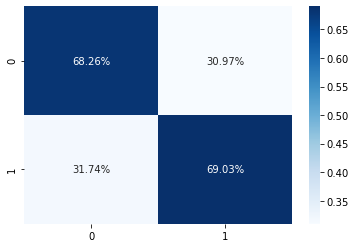

In [93]:
from sklearn.metrics import confusion_matrix

# Matriz de Confusão da Base de Teste
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [94]:
# F1 Score

from sklearn.metrics import f1_score

treino_f1 = f1_score(y_train, y_train_pred, average=None)
teste_f1 = f1_score(y_test, y_test_pred, average=None)

print('O f1 score da base de treino é: ', treino_f1)
print('O f1 score da base de teste é: ', teste_f1)

O f1 score da base de treino é:  [0.73420663 0.76353383]
O f1 score da base de teste é:  [0.66624265 0.70498946]


<div class="alert alert-warning">
O modelo utilizado, apesar de não ter uma performance tão alta, não está overfittando como anteriormente. No modelo atual, a diferença entre a acurácia do train set e do test set está mais razoável. O modelo de Random Forest poderia ficar ainda melhor utilizando Grid Search ao invés do Randomized Search. Há também a possibilidade de usar outro algoritmo.
</div>

In [95]:
# Variável para avaliar a importância de cada feature no modelo
selecionadas = df_norm[['gender', 'education', 'house_val', 'age', 'online', 'child',
       'mortgage', 'house_owner', 'car_prob', 'fam_income', 'customer_psy_A',
       'customer_psy_B', 'customer_psy_C', 'customer_psy_D', 'customer_psy_E',
       'customer_psy_F', 'customer_psy_G', 'customer_psy_H', 'customer_psy_I',
       'customer_psy_J', 'occupation_Blue Collar', 'occupation_Farm',
       'occupation_Others', 'occupation_Professional', 'occupation_Retired',
       'occupation_Sales/Service', 'region_Midwest', 'region_Northeast',
       'region_Rest', 'region_South', 'region_West']]

1. feature 2 (0.158944)
2. feature 0 (0.110013)
3. feature 8 (0.089512)
4. feature 6 (0.086273)
5. feature 23 (0.085762)
6. feature 1 (0.084335)
7. feature 3 (0.075370)
8. feature 4 (0.068869)
9. feature 9 (0.068471)
10. feature 12 (0.031038)
11. feature 24 (0.026088)
12. feature 5 (0.013372)
13. feature 13 (0.008642)
14. feature 16 (0.008608)
15. feature 7 (0.008237)
16. feature 29 (0.008206)
17. feature 11 (0.007741)
18. feature 20 (0.006926)
19. feature 30 (0.006358)
20. feature 27 (0.006146)
21. feature 14 (0.006000)
22. feature 25 (0.005992)
23. feature 26 (0.005520)
24. feature 15 (0.003949)
25. feature 19 (0.003891)
26. feature 10 (0.003546)
27. feature 18 (0.003432)
28. feature 22 (0.003410)
29. feature 17 (0.002572)
30. feature 28 (0.001411)
31. feature 21 (0.001367)


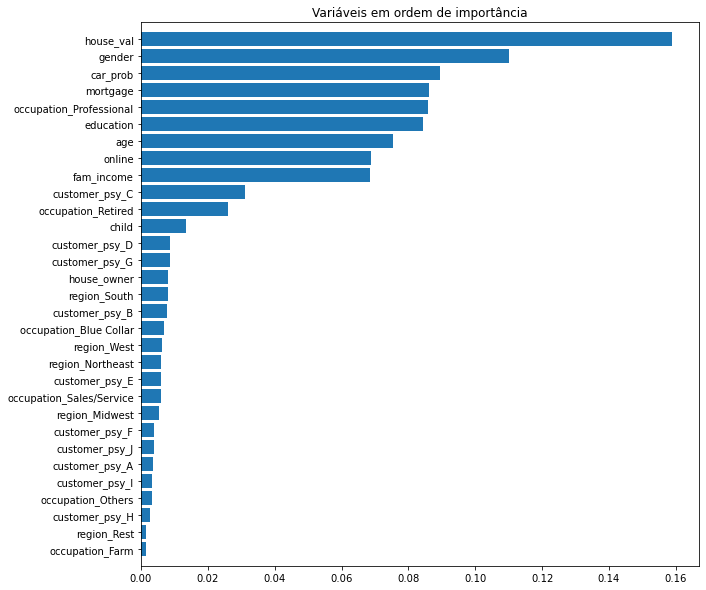

In [96]:
# Feature Importance Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotar a importância das features com base na impureza
plt.figure(figsize = [10,10])
plt.title("Variáveis em ordem de importância")
plt.barh(range(x.shape[1]), importances[indices])
plt.yticks(range(x.shape[1]), [selecionadas.columns[i] for i in indices])
plt.ylim([x.shape[1], -1])
plt.show()

## 5.6. Próximos Passos

<div class="alert alert-danger">O gráfico de importância de features mostra que a feature 'house_val' foi a mais importante no algoritmo de classificação utilizado. Sendo assim, como próximo passo, é possível fazer a tratativa dos zeros encontrados nessa coluna para checar se o modelo poderia ter um resultado melhor.
</div>

## 5.7. Exportação do Modelo

In [97]:
# Importação da biblioteca para salvar o modelo
import pickle

Pkl_Filename = "Pickle_RandomForest.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)